In [11]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
data.data.shape

(569, 30)

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.target.shape

(569,)

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:

X_train, X_test, y_train, y_test = train_test_split(data.data,data.target, test_size=0.33)
N, D = X_train.shape

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
r = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 45ms/step - loss: 0.9019 - accuracy: 0.4462 - val_loss: 0.7297 - val_accuracy: 0.5000
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8323 - accuracy: 0.4871 - val_loss: 0.6610 - val_accuracy: 0.5798
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7389 - accuracy: 0.5639 - val_loss: 0.6011 - val_accuracy: 0.6596
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6946 - accuracy: 0.5639 - val_loss: 0.5492 - val_accuracy: 0.6968
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5910 - accuracy: 0.6422 - val_loss: 0.5054 - val_accuracy: 0.7340
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5754 - accuracy: 0.6723 - val_loss: 0.4680 - val_accuracy: 0.7872
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4921 - accuracy: 0.7511 - val_loss: 0.4370 - val_accuracy: 0.8138
Epoch 8/100


In [19]:
print("Train score:",model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.9816
Train score: [0.10150905698537827, 0.9816272854804993]
6/6 [==============================] - 0s 2ms/step - loss: 0.1129 - accuracy: 0.9681
Test score: [0.1129121407866478, 0.9680851101875305]


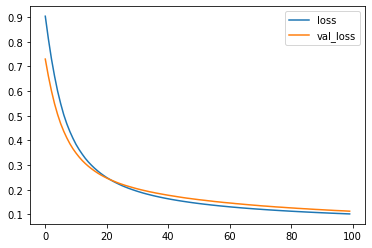

In [20]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

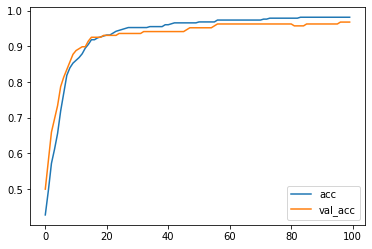

In [21]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()